**Artificial Neural Network(ANN)**

Artificial Neural Networks contain artificial neurons which are called units. These units are arranged in a series of layers that together constitute the whole.

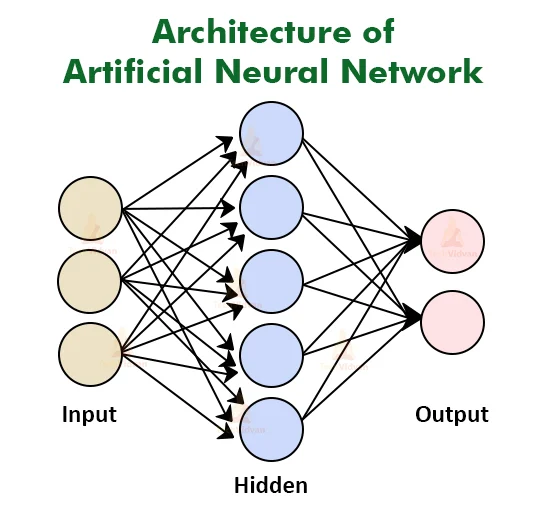

1 Import Library

2 Load Data

3 Data Visualization and Cleaning - EDA

4 Data Preprocessing

5 Model

6 Conclusion

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
from google.colab import files
uploaded = files.upload()

Saving weatherPrediction.csv to weatherPrediction.csv


In [3]:
#Load dataset
df = pd.read_csv('weatherPrediction.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

<Axes: xlabel='RainTomorrow', ylabel='count'>

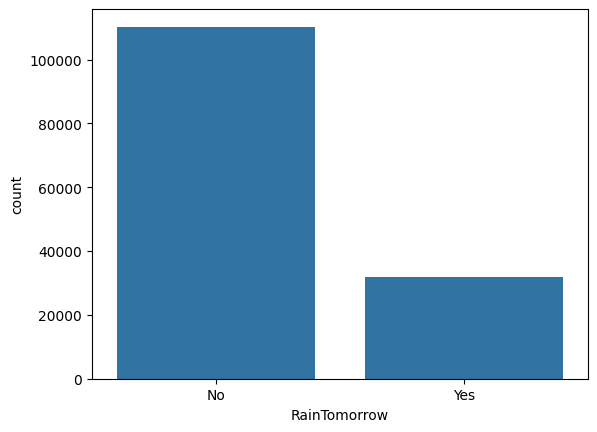

In [ ]:
sns.countplot(x=df['RainTomorrow'])

In [ ]:
df.dtypes

,0
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object


In [ ]:
#Display only float data types columns
float_col=df.select_dtypes(include=['float64'])
print(float_col)

        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6          NaN       NaN           44.0   
1           7.4     25.1       0.0          NaN       NaN           44.0   
2          12.9     25.7       0.0          NaN       NaN           46.0   
3           9.2     28.0       0.0          NaN       NaN           24.0   
4          17.5     32.3       1.0          NaN       NaN           41.0   
...         ...      ...       ...          ...       ...            ...   
142188      3.5     21.8       0.0          NaN       NaN           31.0   
142189      2.8     23.4       0.0          NaN       NaN           31.0   
142190      3.6     25.3       0.0          NaN       NaN           22.0   
142191      5.4     26.9       0.0          NaN       NaN           37.0   
142192      7.8     27.0       0.0          NaN       NaN           28.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0         

In [ ]:
data2=float_col
data2.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,1.0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2


In [ ]:
corr=data2.corr()
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.162923
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.069404
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.049240
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.172417
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.313183


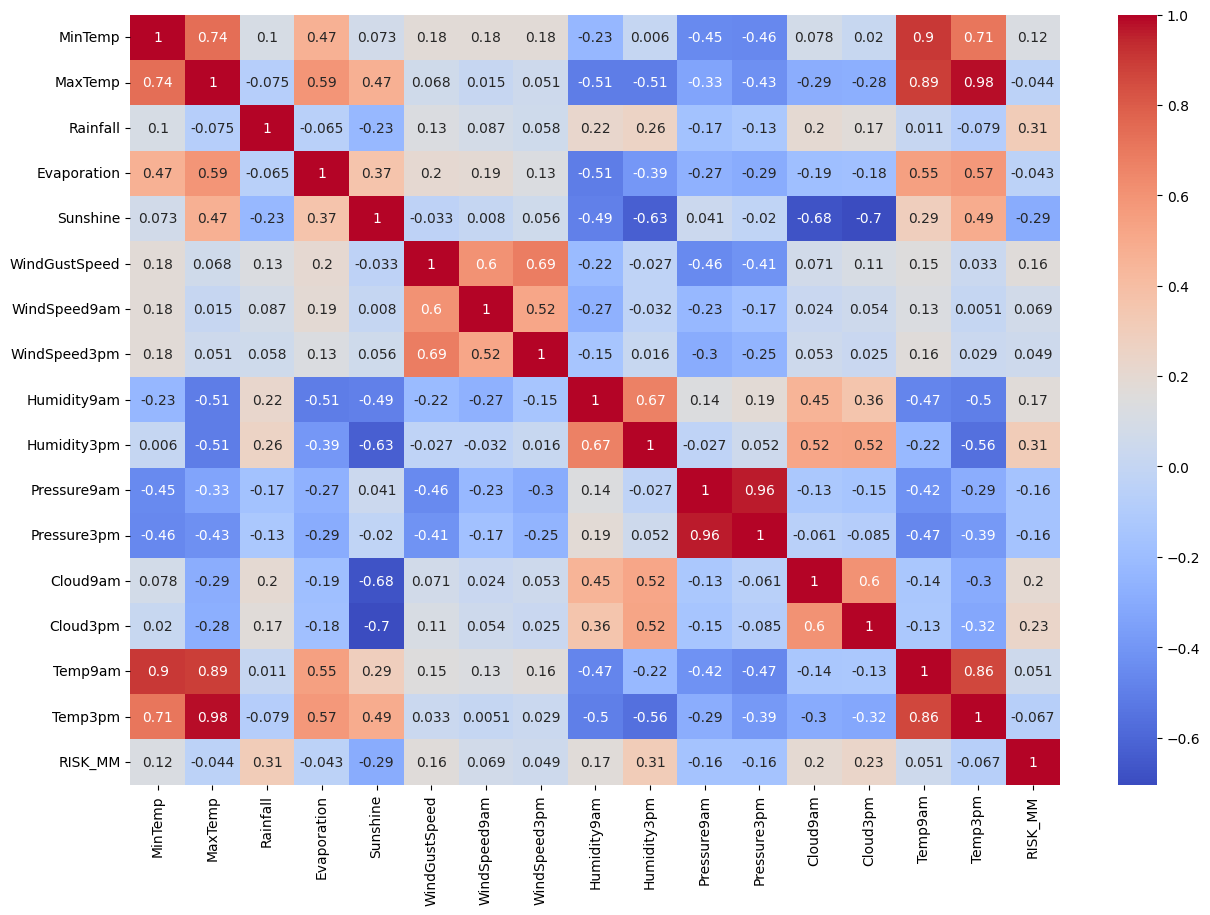

In [ ]:
#Correlation with numeric columns attribute
corr=data2.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
#Get Categorical variables
obj_col=df.select_dtypes(include=['object'])
print(obj_col)

              Date Location WindGustDir WindDir9am WindDir3pm RainToday  \
0       2008-12-01   Albury           W          W        WNW        No   
1       2008-12-02   Albury         WNW        NNW        WSW        No   
2       2008-12-03   Albury         WSW          W        WSW        No   
3       2008-12-04   Albury          NE         SE          E        No   
4       2008-12-05   Albury           W        ENE         NW        No   
...            ...      ...         ...        ...        ...       ...   
142188  2017-06-20    Uluru           E        ESE          E        No   
142189  2017-06-21    Uluru           E         SE        ENE        No   
142190  2017-06-22    Uluru         NNW         SE          N        No   
142191  2017-06-23    Uluru           N         SE        WNW        No   
142192  2017-06-24    Uluru          SE        SSE          N        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3          

In [10]:
#list of categorical
ct=(df.dtypes=='object')
cat_col=ct[ct].index
print(cat_col)

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [11]:
df['WindGustDir'].isnull().sum()

9330

In [13]:
#Missing values in Categroical
for a in cat_col:
  print(a,df[a].isnull().sum())


Date 0
Location 0
WindGustDir 9330
WindDir9am 10013
WindDir3pm 3778
RainToday 1406
RainTomorrow 0


In [14]:
#Fill The null values by mode into categorical Data
for a in cat_col:
  df[a].fillna(df[a].mode()[0],inplace=True)

In [15]:
#Check Categorical Null values again
for a in cat_col:
  print(a,df[a].isnull().sum())

Date 0
Location 0
WindGustDir 0
WindDir9am 0
WindDir3pm 0
RainToday 0
RainTomorrow 0


In [17]:
#Get list of numeric columns
num_col=df.select_dtypes(include=['float64'])
print(num_col.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')


In [18]:
#show missing values
for a in num_col:
  print(a,df[a].isnull().sum())

MinTemp 637
MaxTemp 322
Rainfall 1406
Evaporation 60843
Sunshine 67816
WindGustSpeed 9270
WindSpeed9am 1348
WindSpeed3pm 2630
Humidity9am 1774
Humidity3pm 3610
Pressure9am 14014
Pressure3pm 13981
Cloud9am 53657
Cloud3pm 57094
Temp9am 904
Temp3pm 2726
RISK_MM 0


In [19]:
#Filling missing values with median
for name in num_col:
  df[name].fillna(df[name].median(),inplace=True)


In [20]:
#show missing values
for a in num_col:
  print(a,df[a].isnull().sum())

MinTemp 0
MaxTemp 0
Rainfall 0
Evaporation 0
Sunshine 0
WindGustSpeed 0
WindSpeed9am 0
WindSpeed3pm 0
Humidity9am 0
Humidity3pm 0
Pressure9am 0
Pressure3pm 0
Cloud9am 0
Cloud3pm 0
Temp9am 0
Temp3pm 0
RISK_MM 0


In [30]:
#fetch year from date
df['year']=pd.DatetimeIndex(df['Date']).year

#groupy by rainfaill according to year
gd=df.groupby('year')['Rainfall'].sum().reset_index()
gd

,year,Rainfall
0,2007,196.4
1,2008,5141.2
2,2009,35652.5
3,2010,43828.6
4,2011,42163.4
5,2012,35825.5
6,2013,36108.3
7,2014,33603.3
8,2015,36492.7
9,2016,41154.5


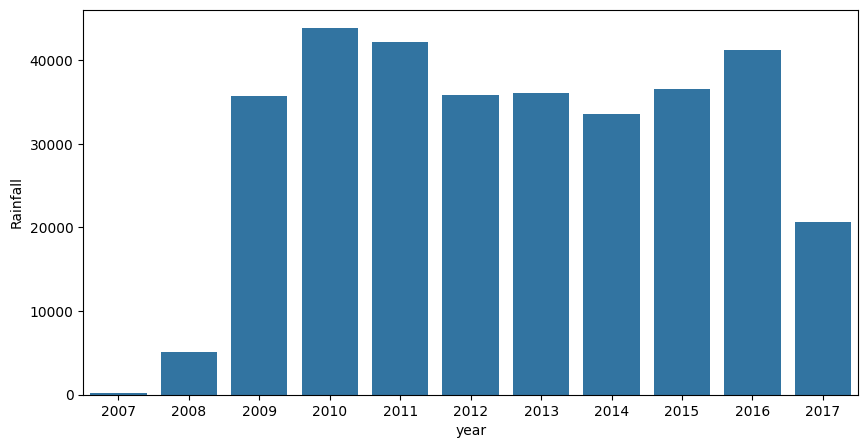

In [34]:
#Visulailization of year wise rain
plt.figure(figsize=(10,5))
sns.barplot(x='year',y='Rainfall',data=gd)
plt.show()

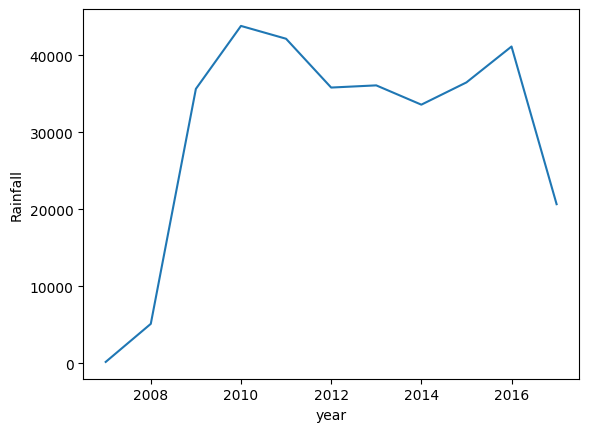

In [35]:
#visulaise into line plot using with line seaborn
sns.lineplot(x='year',y='Rainfall',data=gd)
plt.show()


In [37]:
cat_col

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

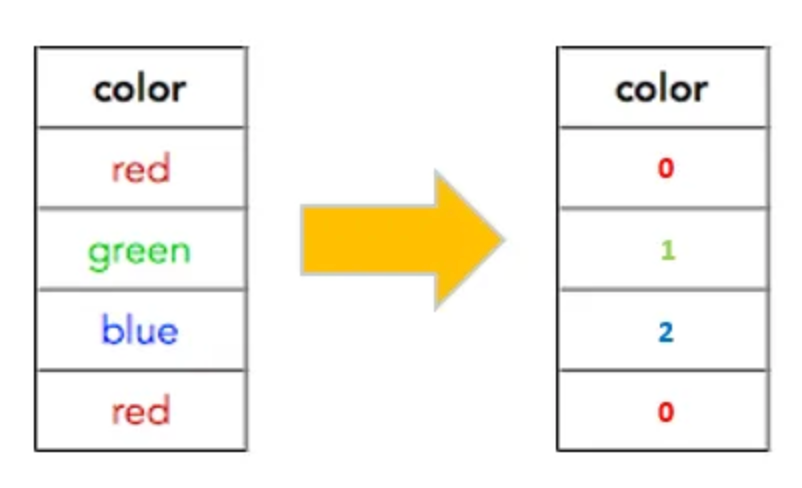

In [41]:
#Apply label econding for categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for a in cat_col:
  df[a]=le.fit_transform(df[a])
  print(a,df[a].unique())


Date [396 397 398 ...  89  90  91]
Location [ 2  4 10 11 21 24 26 27 30 34 37 38 42 45 47  9 40 23  5  6 35 19 18 20
 25 33 44 12  7  8 14 39  0 22 28 48  1 46 29 32 31 36 43 15 17  3 13 16
 41]
WindGustDir [13 14 15  4  6  3  5 12  1 10  8  7  9  2  0 11]
WindDir9am [13  6  9  1 12 10  8  4  3 11 15  2  0  7 14  5]
WindDir3pm [14 15  0  7 13 10  2  1  6 11 12  9  3  8  5  4]
RainToday [0 1]
RainTomorrow [0 1]


In [42]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow', 'year'],
      dtype='object')

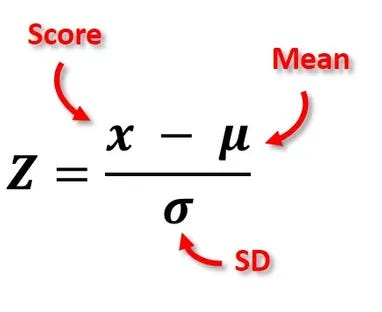

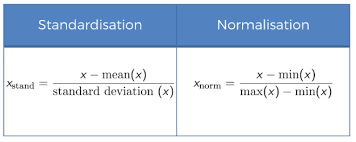

In [44]:
#Drop Some Columns
features=df.drop(['RainTomorrow','Date','year'],axis=1)

target=df['RainTomorrow']

#Set the Scaling features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
features=sc.fit_transform(features)
features=pd.DataFrame(features)
features.head()




,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.527004,0.190085,-0.045764,-0.204920,-0.120303,0.16528,1.052556,0.310479,1.328933,1.366277,...,0.113127,-1.436563,-1.474667,-1.220105,1.460297,0.140339,-0.013238,0.018050,-0.532962,-0.278450
1,-1.527004,-0.749042,0.263677,-0.276125,-0.120303,0.16528,1.265582,0.310479,-0.221571,1.586236,...,-1.312997,-1.290451,-1.044798,-1.115343,0.152737,0.140339,0.033114,0.381886,-0.532962,-0.278450
2,-1.527004,0.111824,0.348070,-0.276125,-0.120303,0.16528,1.478609,0.462679,1.328933,1.586236,...,-1.629913,-1.046931,-1.489490,-0.980648,0.152737,-1.275593,0.620242,0.221798,-0.532962,-0.278450
3,-1.527004,-0.467304,0.671577,-0.276125,-0.120303,0.16528,-0.864683,-1.211523,0.442931,-1.713146,...,-1.260177,-1.728788,-0.007183,-0.367040,0.152737,0.140339,0.172171,0.702062,-0.532962,-0.160497
4,-1.527004,0.831821,1.276393,-0.157450,-0.120303,0.16528,1.052556,0.082179,-1.329073,-0.173434,...,0.694140,-0.900818,-1.015152,-1.384732,1.024444,1.556271,0.125818,1.167773,-0.532962,-0.254859
